In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.optimize as opt
import scipy.io as sio
import analysis_utils as au
import importlib

In [ ]:
filename_1 = 'D:/Simulation Data/240501/optimal filter/'
yfb_l = np.array([1])*2*np.pi
for yfb in yfb_l:
    
    numbins = int(2*5*10**4*100*2*np.pi/yfb)
    amp_max = []
    for i in range(1000):
        max = au.bandpass_peak_find(filename+'/Kicks/' + str(i) +'.mat', cf, BW, 10**6, 5)
        amp_max.append(max)

    amp_max_n = []
    for i in range(1000):
        max = au.bandpass_peak_find_noise(filename+'/Noise/' + str(i) +'.mat', cf, BW, 10**6, 5)
        amp_max_n.append(max)
    
    analysis_dict = {'Kicks': corr_max, 'Kicks noise': corr_max_n, 'Band-pass filter': amp_max, 'Band-pass filter noise': amp_max_n}
    sio.savemat(filename_1 + 'analysis' + str(int(yfb/2/np.pi)) +'.mat', analysis_dict)

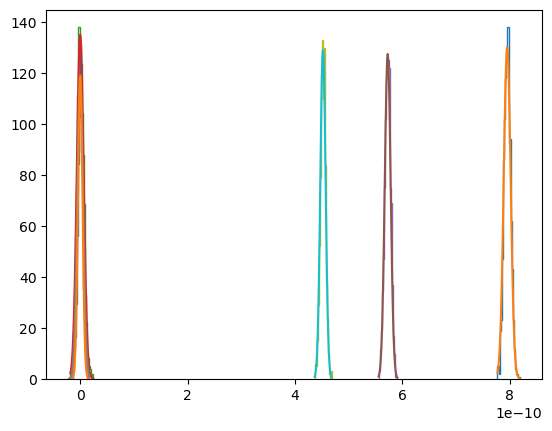

In [11]:
importlib.reload(au)

BW_l = [50000, 20000, 10000]
yfb_l = np.array([10000])*2*np.pi
kick_mean = np.zeros((len(yfb_l), len(BW_l)))
kick_width = np.zeros((len(yfb_l), len(BW_l)))
noise_width = np.zeros((len(yfb_l), len(BW_l)))
cf = 55000

for n, yfb in enumerate(yfb_l):
    filename = 'D:/Simulation Data/240501/yfb' + str(round(yfb/2/np.pi))
    for m, BW in enumerate(BW_l):

        amp_max = []
        for i in range(1000):
            max = au.bandpass_peak_find(filename+'/Kicks/' + str(i) +'.mat', cf, BW, 10**6, 5)
            amp_max.append(max)

        amp_max_n = []
        for i in range(1000):
            max = au.bandpass_peak_find_noise(filename+'/Noise/' + str(i) +'.mat', cf, BW, 10**6, 5)
            amp_max_n.append(max)

        hist3, bins3, fit3, x_hist3, fitted3 = au.histogram_and_fit(amp_max, 20, 5, fit = True, plot = False)
        hist4, bins4, fit4, x_hist4, fitted4 = au.histogram_and_fit(amp_max_n, 20, 5, fit = True, plot = False)

        plt.stairs(hist3, bins3)
        plt.plot(x_hist3, fitted3)
        plt.stairs(hist4/np.max(hist4)*np.max(hist3), bins4)
        plt.plot(x_hist4, fitted4/np.max(hist4)*np.max(hist3))

        kick_mean[n, m] = fit3[1]
        kick_width[n, m] = fit3[2]
        noise_width[n, m] = fit4[2]